## Libraries Import

In [1]:
import pandas as pd # data manipulation
import numpy as np # array manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

Matplotlib is building the font cache; this may take a moment.


## Reading Files

In [2]:
business_owners = pd.read_pickle(r'datasets\business_owners.p')
census = pd.read_pickle(r'datasets\census.p')
land_use = pd.read_pickle(r'datasets\land_use.p')
licenses = pd.read_pickle(r'datasets\licenses.p')
ward = pd.read_pickle(r'datasets\ward.p')
taxi_owners = pd.read_pickle(r'datasets\taxi_owners.p')
taxi_vehicles = pd.read_pickle(r'datasets\\taxi_vehicles.p')
zip_df = pd.read_pickle(r'datasets\zip_demo.p')

In [3]:
zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     66 non-null     object
 1   income  66 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [4]:
ward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ward      50 non-null     object
 1   alderman  50 non-null     object
 2   address   50 non-null     object
 3   zip       50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


## Checking Files

In [5]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [6]:
ward.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


## Merge Files
![img](https://www.datacourses.com/wp-content/uploads/2019/11/join-types-merge-names.jpg)

The Pandas module contains various features to perform various operations on Dataframes like join, concatenate, delete, add, etc. In this article, we are going to discuss the various types of join operations that can be performed on Pandas Dataframe. There are five types of Joins in Pandas.

- Inner Join
- Left Outer Join
- Right Outer Join
- Full Outer Join or simply Outer Join
- Index Join

#### Inner Join

In [9]:
taxi_vehicles.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [8]:
taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [10]:
taxi_owners.merge(taxi_vehicles, how='inner').head()

,rid,vid,owner,address,zip,make,model,year,fuel_type
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE


In [12]:
taxi_vehicles[taxi_vehicles['vid']=='6285']

,vid,make,model,year,fuel_type,owner
3057,6285,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC


In [16]:
# on what columns to merge
taxi_owners.merge(taxi_vehicles, how='inner', on='vid').head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [14]:
# on what multiple columns to merge
taxi_owners.merge(taxi_vehicles, how='inner', on=['vid','owner']).head()

,rid,vid,owner,address,zip,make,model,year,fuel_type
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE


In [18]:
# on what columns to merge
# adding suffixes
taxi_owners.merge(taxi_vehicles, how='inner', on='vid', suffixes=['_company','_vehicles']).head()

,rid,vid,owner_company,address,zip,make,model,year,fuel_type,owner_vehicles
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [19]:
# find me the rows where the vechicle id is not same


#### Left Join

In [20]:
business_owners.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [21]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [26]:
business_owners.shape

(21352, 4)

In [37]:
left_merged_df = business_owners.merge(licenses, on="account", how="left")
print("Left Join:")
left_merged_df.head()

Left Join:


,account,first_name,last_name,title,ward,aid,business,address,zip
0,10,PEARL,SHERMAN,PRESIDENT,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
1,10,PEARL,SHERMAN,SECRETARY,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,WALTER,MROZEK,PARTNER,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10002,CELINA,BYRDAK,PARTNER,14,775,CELINA DELI,5089 S ARCHER AVE,60632
4,10005,IRENE,ROSENFELD,PRESIDENT,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609


In [38]:
left_merged_df.tail()

,account,first_name,last_name,title,ward,aid,business,address,zip
21347,9513,THOMAS,MAHLUM,SECRETARY,NaN,NaN,NaN,NaN,NaN
21348,9563,GUADALUPE,PEREZ,PRESIDENT,NaN,NaN,NaN,NaN,NaN
21349,9638,STEVEN,JENSEN,VICE PRESIDENT,NaN,NaN,NaN,NaN,NaN
21350,9922,MANUEL,SALAZAR,SECRETARY,NaN,NaN,NaN,NaN,NaN
21351,9933,MICHAEL,KNAB,PRESIDENT,NaN,NaN,NaN,NaN,NaN


In [39]:
left_merged_df.shape

(21352, 9)

In [40]:
inner_business_lic = business_owners.merge(licenses, on='account', how='inner')

In [41]:
inner_business_lic.shape

(19497, 9)

In [42]:
left_merged_df.shape[0]-inner_business_lic.shape[0]

1855

#### Right Join

#### Full Outer Join

#### Index Join

## Data Visualization

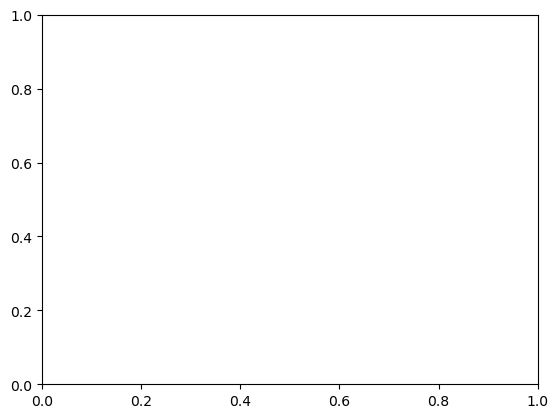

In [43]:
fig, ax = plt.subplots()

In [ ]:
# plt.figure(figsize=(12, 6))
# plt.bar(census['ward'], census['pop_2010'] - census['pop_2000'], color='skyblue', edgecolor='black')
# plt.title("Population Change by Ward (2000-2010)", fontsize=16)
# plt.xlabel("Ward", fontsize=14)
# plt.ylabel("Population Change", fontsize=14)
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

In [48]:
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


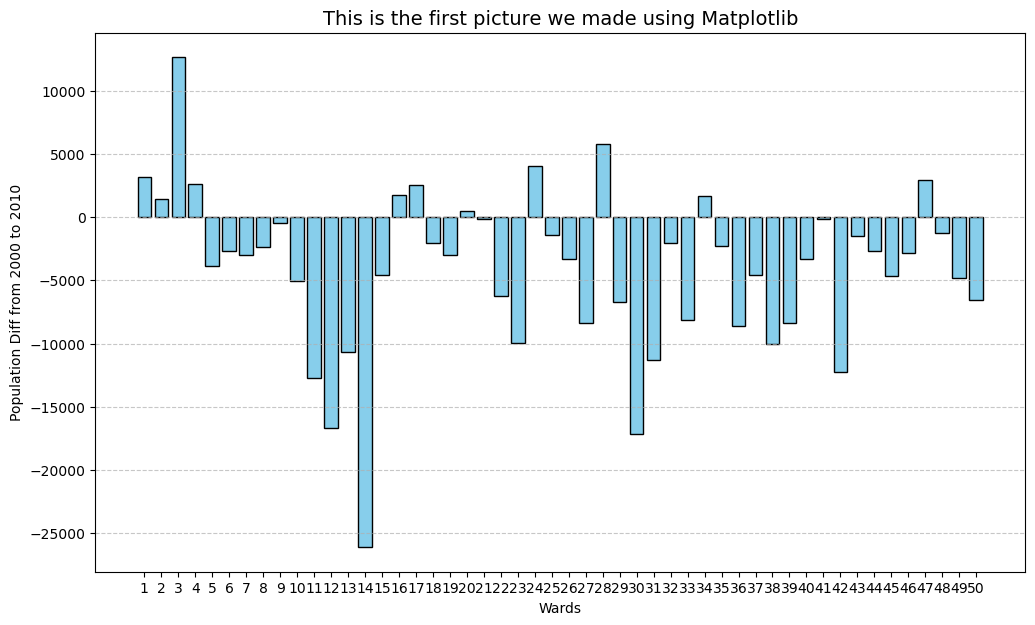

In [51]:
plt.figure(figsize=(12,7))
#         x                y                     
plt.bar(census['ward'], census['pop_2010'] - census['pop_2000'], color='skyblue', edgecolor='black')
plt.title('This is the first picture we made using Matplotlib', fontsize=14)
plt.xlabel('Wards')
plt.ylabel('Population Diff from 2000 to 2010')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [53]:
zip_df.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


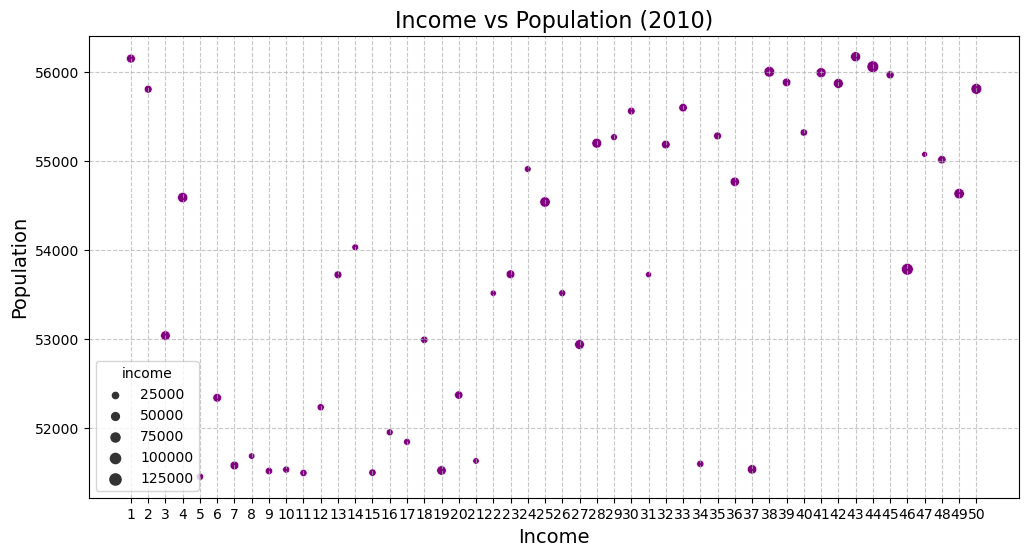

In [54]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=zip_df, x=census['ward'], y=census["pop_2010"], color="purple",size='income')
plt.title("Income vs Population (2010)", fontsize=16)
plt.xlabel("Income", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Uzair\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


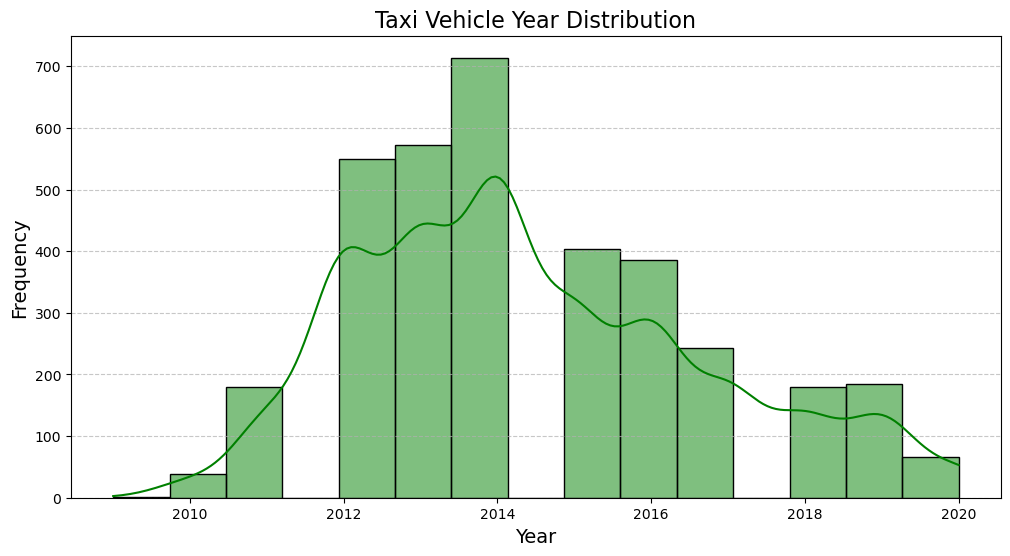

In [55]:
plt.figure(figsize=(12, 6))
sns.histplot(taxi_vehicles["year"], kde=True, color="green", bins=15)
plt.title("Taxi Vehicle Year Distribution", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()